In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/Users/awxlong/Desktop/my-studies/hpc_exps/')

In [3]:
from torchcam.methods import SmoothGradCAMpp
import h5py
import numpy as np
import pickle
from scipy.stats import rankdata
import pdb
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from pytorch_lightning import Trainer
import torch 
from HistoMIL.MODEL.Image.MIL.TransMIL.pl import pl_TransMIL
from HistoMIL.MODEL.Image.MIL.TransMIL.paras import  TransMILParas

from HistoMIL.MODEL.Image.MIL.TransMILMultimodal.pl import pl_TransMILMultimodal
from HistoMIL.MODEL.Image.MIL.TransMILMultimodal.paras import  TransMILMultimodalParas

from HistoMIL.MODEL.Image.MIL.CLAM.pl import pl_CLAM
from HistoMIL.MODEL.Image.MIL.CLAM.paras import  CLAMParas

from HistoMIL.MODEL.Image.MIL.Transformer.pl import pl_Transformer
from HistoMIL.MODEL.Image.MIL.Transformer.paras import  TransformerParas

from HistoMIL.MODEL.Image.MIL.AttentionMIL.pl import pl_AttentionMIL
from HistoMIL.MODEL.Image.MIL.AttentionMIL.paras import  AttentionMILParas


from HistoMIL.MODEL.Image.MIL.DTFD_MIL.pl import pl_DTFD_MIL
from HistoMIL.MODEL.Image.MIL.DTFD_MIL.paras import  DTFD_MILParas


from HistoMIL.MODEL.Image.MIL.CAMIL.pl import pl_CAMIL
from HistoMIL.MODEL.Image.MIL.CAMIL.paras import  CAMILParas


from HistoMIL.MODEL.Image.MIL.TransMILRegression.pl import pl_TransMILRegression
from HistoMIL.MODEL.Image.MIL.TransMILRegression.paras import  TransMILRegressionParas

from HistoMIL.MODEL.Image.MIL.GraphTransformer.pl import pl_GraphTransformer
from HistoMIL.MODEL.Image.MIL.GraphTransformer.paras import GraphTransformerParas

from HistoMIL.DATA.Slide.concepts.WholeSlideImage import WholeSlideImageHeatmap


/Users/awxlong/anaconda3/envs/biomedai/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
wsi_object = WholeSlideImageHeatmap(path='/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/8472de58-9075-4534-b00b-3a87ba2158da/TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs')
label = 0
# pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/tcga_folder_1.TCGA-A8-A085-01Z-00-DX1.2B52D1B8-5AD4-4BD6-ADF7-9D65B8EE2622.svs.pkl'
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pkl'
with open(pkl_path, 'rb') as f:
    wsi_tissue = pickle.load(f)
wsi_coords = h5py.File('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Patch/224_224/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.h5')
wsi_coords = wsi_coords['coords']

In [6]:
wsi_object = WholeSlideImageHeatmap(path='/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/tiff_folder_1/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff')
label = 0
# pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/tcga_folder_1.TCGA-A8-A085-01Z-00-DX1.2B52D1B8-5AD4-4BD6-ADF7-9D65B8EE2622.svs.pkl'
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/0a3de921-dcda-4282-bf55-224bee8000dc.TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff.pkl'
with open(pkl_path, 'rb') as f:
    wsi_tissue = pickle.load(f)
wsi_coords = h5py.File('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Patch/224_224/0a3de921-dcda-4282-bf55-224bee8000dc.TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff.h5')
wsi_coords = wsi_coords['coords']

In [7]:
wsi_object.contours_tissue = wsi_tissue['tissue']
wsi_object.holes_tissue = wsi_tissue['holes']

In [10]:
feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/0bdf189f-bfe3-4587-8303-d1905a3822e4.TCGA-F4-6856-01Z-00-DX1.2872c7b5-b94d-4147-ad90-69f88668135a.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/35e53d2b-8e11-4e5c-ac45-87ea9a504c4b.TCGA-F5-6812-01Z-00-DX1.47a702ae-cfc6-48ea-8ac0-f9ec194cfb6e.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/resnet50/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/74a7137c-ea54-477d-a505-2cf147f3cf24.TCGA-AA-A029-01Z-00-DX1.36BA3129-431D-4AE5-98E6-BA064D0B5062.svs.pt')
feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/prov-gigapath/0a3de921-dcda-4282-bf55-224bee8000dc.TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff.pt')
feat_adj_matrix = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/resnet50_adj_matrix/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
clinical_feats = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/clinical/test/TCGA-AD-6963.pt')


In [11]:
print(feat_embedding.shape)
feat_embedding[0:3, :]
print(clinical_feats.shape, clinical_feats)
feat_adj_matrix

torch.Size([2378, 1536])
torch.Size([27]) tensor([0.4386, 0.1019, 0.0778, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000])


tensor(indices=tensor([[   0,    0,    0,  ..., 5667, 5667, 5667],
                       [   0,    1,    9,  ..., 5665, 5646, 5660]]),
       values=tensor([0.8699, 0.8188, 0.8699,  ..., 0.8725, 0.7761, 0.7711]),
       size=(5668, 5668), nnz=45344, layout=torch.sparse_coo)

In [12]:
clinical_feats.shape

torch.Size([27])

In [8]:
patch_size = (224, 224)
wsi_ref_downsample = wsi_object.level_downsamples[0]
patch_custom_downsample = 1
vis_patch_size = tuple((np.array(patch_size) * np.array(wsi_ref_downsample) * patch_custom_downsample ).astype(int))
vis_patch_size
overlap = 0
top_left = None
bot_right = None

In [9]:
def to_percentiles(scores):
    
    scores = rankdata(scores, 'average')/len(scores) * 100   
    return scores

def top_k(scores, k, invert=False):
    if invert:
        top_k_ids=scores.argsort()[:k]
    else:
        top_k_ids=scores.argsort()[::-1][:k]
    return top_k_ids

def screen_coords(scores, coords, top_left, bot_right):
    bot_right = np.array(bot_right)
    top_left = np.array(top_left)
    mask = np.logical_and(np.all(coords >= top_left, axis=1), np.all(coords <= bot_right, axis=1))
    scores = scores[mask]
    coords = coords[mask]
    return scores, coords

def sample_indices(scores, k, start=0.48, end=0.52, convert_to_percentile=False, seed=1):
    np.random.seed(seed)
    if convert_to_percentile:
        end_value = np.quantile(scores, end)
        start_value = np.quantile(scores, start)
    else:
        end_value = end
        start_value = start
    score_window = np.logical_and(scores >= start_value, scores <= end_value)
    indices = np.where(score_window)[0]
    if len(indices) < 1:
        return -1 
    else:
        return np.random.choice(indices, min(k, len(indices)), replace=False)

def sample_rois(scores, coords, k=5, mode='range_sample', seed=1, score_start=0.45, score_end=0.55, top_left=None, bot_right=None):

    if len(scores.shape) == 2:
        scores = scores.flatten()

    scores = to_percentiles(scores)
    if top_left is not None and bot_right is not None:
        scores, coords = screen_coords(scores, coords, top_left, bot_right)

    if mode == 'range_sample':
        sampled_ids = sample_indices(scores, start=score_start, end=score_end, k=k, convert_to_percentile=False, seed=seed)
    elif mode == 'topk':
        sampled_ids = top_k(scores, k, invert=False)
    elif mode == 'reverse_topk':
        sampled_ids = top_k(scores, k, invert=True)
    else:
        raise NotImplementedError
    # pdb.set_trace()
    coords = coords[:][sampled_ids]
    scores = scores[sampled_ids]

    asset = {'sampled_coords': coords, 'sampled_scores': scores}
    return asset

In [10]:
samples = [{'name': 'topk_high_attention', 'sample': True, 'seed': 42, 'k': 15, 'mode': 'topk'}]

In [11]:
# label, Y_hats[0]
sampled_patches_dir = f"/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap/Camil_UNI/"
patch_level = 0
patch_size = (224, 224)
slide_id = 'TCGA-AD-6963'

In [13]:
heatmap_vis_args = {'convert_to_percentiles': True, 'blur': True, 'custom_downsample': 1}

(1, 2378)

In [17]:

A_null = np.zeros((1, len(wsi_coords))) + 255


In [18]:
patches = wsi_object.fillWhite(scores=A_null, coords=wsi_coords, vis_level=2,  
                                cmap='jet', alpha=1, **heatmap_vis_args, 
                                binarize=False, blank_canvas=False,
                                thresh=-1,  patch_size = vis_patch_size,
                                overlap=overlap, top_left=top_left, bot_right = bot_right)
patches.save(os.path.join('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap', 'tiff_fill_white.jpg'), quality=100)


creating heatmap for: 
top_left:  (0, 0) bot_right:  (105472, 80896)
w: 26368, h: 20224
scaled patch size:  [56 56]

computing foreground tissue mask
detected 6908763/533266432 of region as tissue

computing heatmap image
total of 2378 patches
progress: 474/2378
progress: 949/2378
progress: 1424/2378
progress: 1899/2378
progress: 2374/2378
Done


In [19]:
patches.save(os.path.join('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap', 'tiff_fill_white.tiff'), quality=100)

In [42]:
heatmap = wsi_object.visHeatmap(scores=A_null, coords=wsi_coords, vis_level=2,  
                                cmap='gray', alpha=1, **heatmap_vis_args, 
                                binarize=False, blank_canvas=False,
                                thresh=-1,  patch_size = vis_patch_size,
                                overlap=overlap, top_left=top_left, bot_right = bot_right)


creating heatmap for: 
top_left:  (0, 0) bot_right:  (105472, 80896)
w: 26368, h: 20224
scaled patch size:  [56 56]

computing foreground tissue mask
detected 6908763/533266432 of region as tissue

computing heatmap image
total of 2378 patches
progress: 474/2378
progress: 949/2378
progress: 1424/2378
progress: 1899/2378
progress: 2374/2378
Done


In [30]:
type(heatmap)

PIL.Image.Image

In [43]:
heatmap.save(os.path.join('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap', 'gamma_corrected_tiff_no_heatmap_tissue_wsi.jpg'), quality=100)

In [ ]:
patches = wsi_object.drawPatchBoxes(scores=A_null, coords=wsi_coords, vis_level=2,  
                                cmap='jet', alpha=1, **heatmap_vis_args, 
                                binarize=False, blank_canvas=False,
                                thresh=-1,  patch_size = vis_patch_size,
                                overlap=overlap, top_left=top_left, bot_right = bot_right)
patches.save(os.path.join('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap', 'patches_wsi.jpg'), quality=100)

In [ ]:
import seaborn as sns

# Adj. Matrix Visualization

In [11]:
adj_matrix = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni_adj_matrix/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6964-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6964-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt').to_dense()
adj_matrix = adj_matrix[0:4, 0:4]


In [12]:
np_adj = adj_matrix.cpu().numpy()

In [13]:
import networkx as nx

/var/folders/5g/t9d5_kvd3kb4yljp4f0pvqqc0000gn/T/ipykernel_3255/3342111224.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout for better appearance


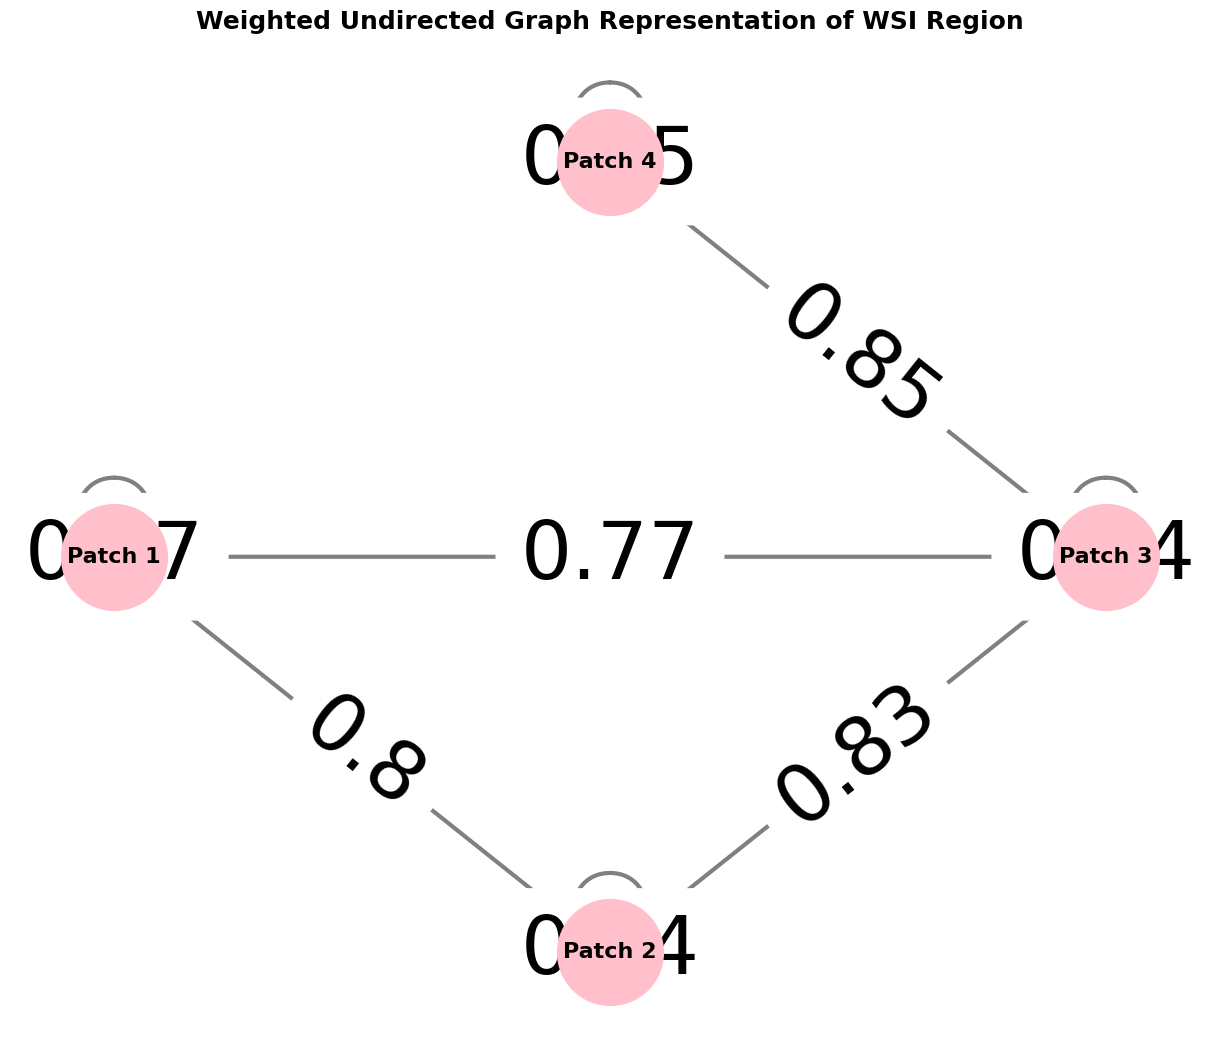

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt


# Example node labels representing patches in a WSI
node_labels = {0: 'Patch 1', 1: 'Patch 2', 2: 'Patch 3', 3: 'Patch 4'}

G = nx.from_numpy_array(np_adj, create_using=nx.Graph)

# Set the positions of the nodes using shell layout
pos = nx.shell_layout(G)

# Draw the graph with thicker edges and larger nodes
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=5800, node_color='pink', 
        font_size=16, font_weight='bold', edge_color='gray', width=3)

# Draw edge labels with weights, rounded to 2 decimals
edge_labels = nx.get_edge_attributes(G, 'weight')
rounded_edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=rounded_edge_labels, font_color='k', font_size=58)

# Set title and show the plot
plt.title('Weighted Undirected Graph Representation of WSI Region', fontsize=18, fontweight='bold')
plt.axis('off')  # Hide axes
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


# visualize_weighted_adjacency_matrix(np_adj, node_labels)


/var/folders/5g/t9d5_kvd3kb4yljp4f0pvqqc0000gn/T/ipykernel_3255/1100226522.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout for better appearance


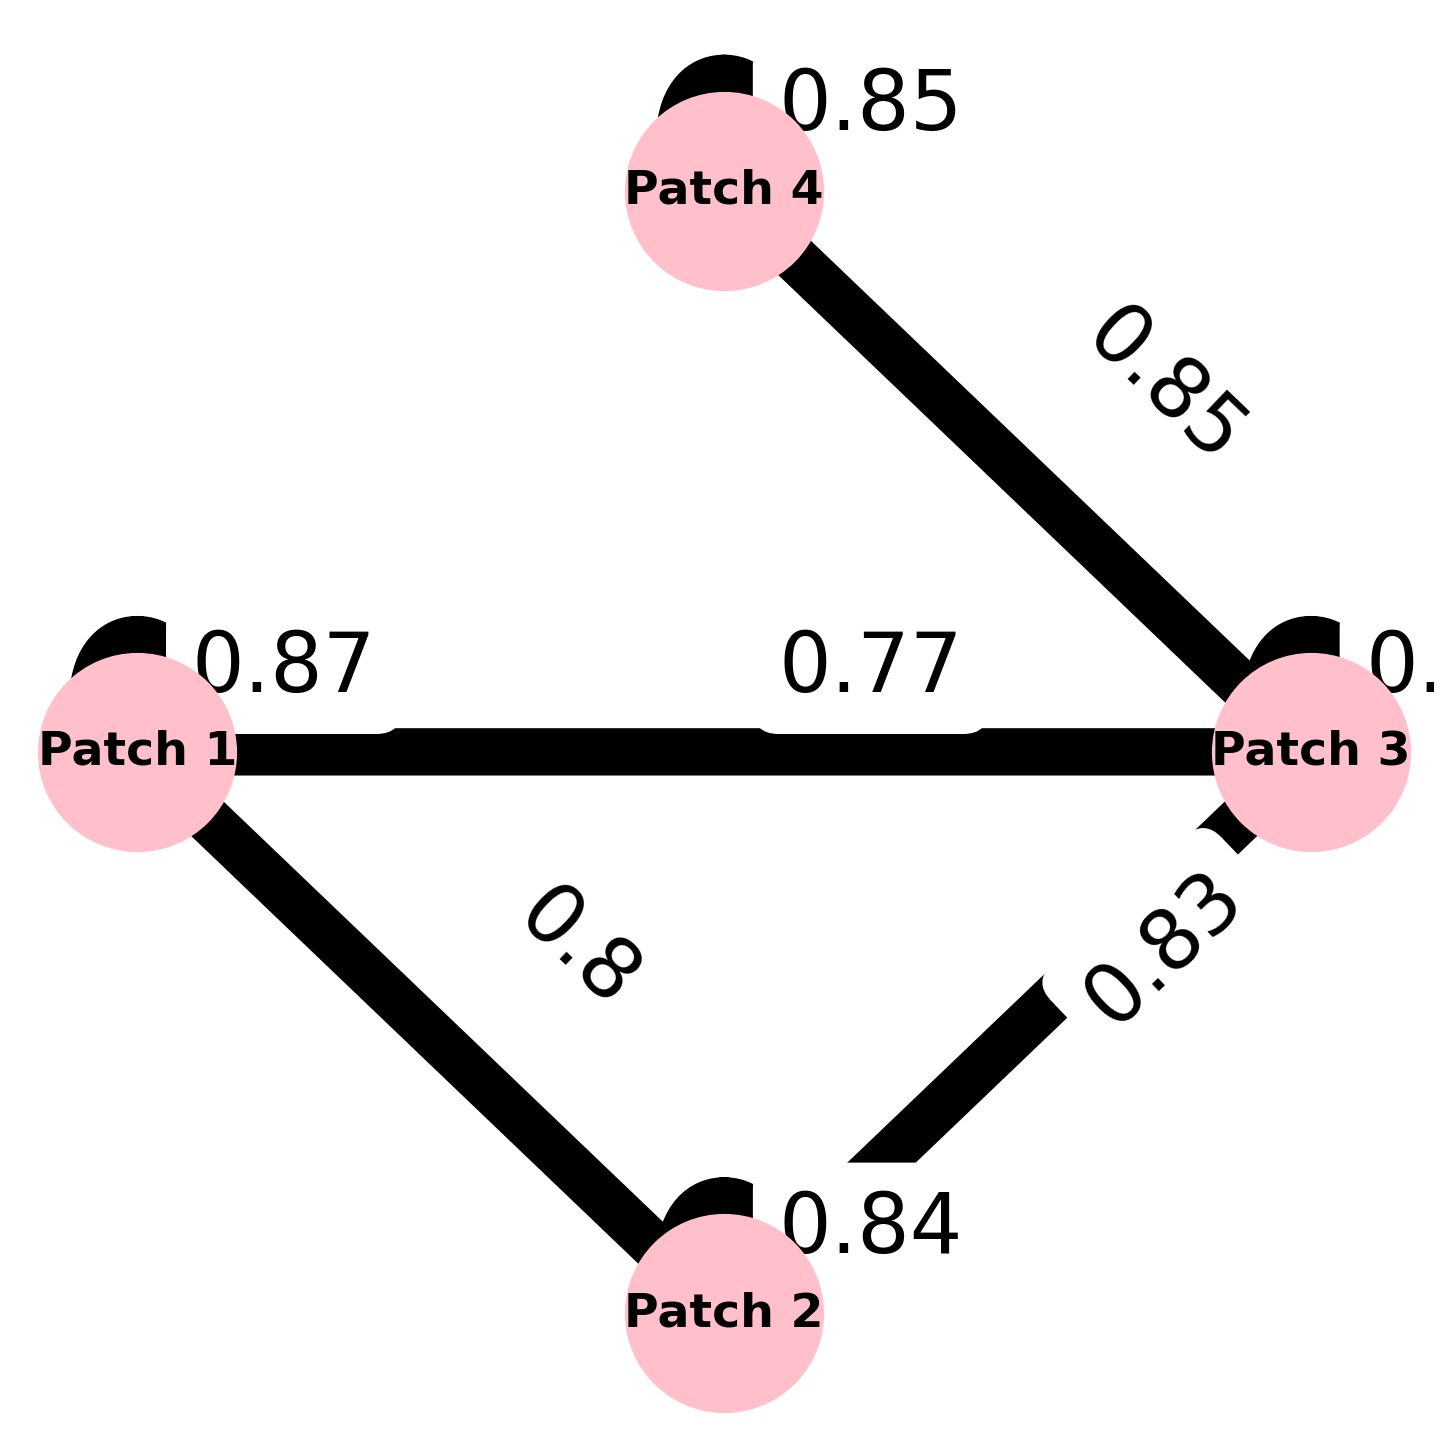

In [27]:
G = nx.from_numpy_array(np_adj, create_using=nx.Graph)

# Set the positions of the nodes using shell layout
pos = nx.shell_layout(G)

# Draw the graph with thicker edges and larger nodes
plt.figure(figsize=(10, 10), dpi=142)
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=10000, node_color='pink', 
        font_size=24, font_weight='bold', edge_color='k', width=24)

# Draw edge labels with weights, rounded to 2 decimals
edge_labels = nx.get_edge_attributes(G, 'weight')
rounded_edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}

# Adjust positions for self-loop labels
for node in G.nodes():
    if G.has_edge(node, node):  # Check for self-loops
        pos[node][0] += 0.25  # Adjust x position
        pos[node][1] += 0.15  # Adjust y position

nx.draw_networkx_edge_labels(G, pos, edge_labels=rounded_edge_labels, font_color='k', font_size=42)

# Set title and show the plot
# plt.title('Weighted Undirected Graph Representation of WSI Region', fontsize=18, fontweight='bold')
plt.axis('off')  # Hide axes
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [ ]:
np_adj

In [ ]:
import seaborn as sns
def plot_heatmap(np_adj):
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8), dpi=142)
    sns.heatmap(np_adj, annot=True, fmt=".2f", cmap='jet', cbar=True, square=True, 
                xticklabels=np.arange(np_adj.shape[1]), yticklabels=np.arange(np_adj.shape[0]))
    
    # Set titles and labels
    plt.title('Adjacency Matrix for \n Weighted Graph Representation of WSI region', fontsize=16, fontweight='bold')
    plt.xlabel('Patches', fontsize=12)
    plt.ylabel('Patches', fontsize=12)
    plt.show()

plot_heatmap(np_adj)

# Clinical features visualization using Integrated Gradients

In [ ]:
grad_dir = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap/HeatmapBeta/g0_arrest/uni/TransMILMultimodal/'
# List to hold the loaded .npy files
npy_files = []

# Iterate over files in the specified directory
for filename in os.listdir(grad_dir):
    if filename.endswith('.npy'):
        # Construct full file path
        file_path = os.path.join(grad_dir, filename)
        # Load the .npy file
        data = np.load(file_path)
        npy_files.append(data)

In [ ]:
clinical_gradients = np.vstack(npy_files)

In [ ]:
clinical_gradients.shape
clinical_gradients

In [ ]:
# clinical_gradients.detach().cpu().numpy()
test = pd.read_csv('/Users/awxlong/Desktop/my-studies/temp_data/COAD/Feature/clinical/test/test.csv')

In [ ]:
test.columns[2:-1].values

In [ ]:
# Rename 'other_dx' to 'other_diseases'
feature_names

In [ ]:

# Get feature names from the DataFrame
feature_names = test.columns[2:-1].values
feature_names = np.where(feature_names == 'Other Dx_Yes', 'Other Diseases_Yes', feature_names)

# Calculate means for each feature
means = np.mean(clinical_gradients, axis=0)

# Sort features by means
sorted_indices = np.argsort(means)
sorted_gradients = clinical_gradients[:, sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Generate colors based on the sorted order using the jet colormap
num_features = len(sorted_feature_names)
colors = plt.cm.jet(np.linspace(0, 1, num_features))

# Create horizontal box plots for each feature
plt.figure(figsize=(12, 8))

# Create a horizontal box plot for each of the sorted features
box = plt.boxplot(sorted_gradients, vert=False, labels=sorted_feature_names, patch_artist=True)

# Color the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add titles and labels with increased font sizes
plt.title('Integrated Gradient Values for Observing Feature Importance \n of Clinical Features in TransMILMultimodal', fontsize=16, fontweight='bold' )
plt.xlabel('Integrated Gradient Values', fontsize=14, fontweight='bold')
plt.ylabel('Clinical Features', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a high-resolution image suitable for publication
plt.savefig('boxplot_clinical_features_IG_TransMILMultimodal.png', dpi=224, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
# Assuming feature_importance_df is already defined and contains the necessary data

# Set the figure size and style
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')  # Use a built-in Matplotlib style
# You can use a colormap from Matplotlib or define your own list of colors
# num_features = len(feature_importance_df)
colors = plt.cm.jet(np.linspace(0, 1, num_features))  # Using the 'viridis' colormap
# Create a horizontal bar plot
plt.barh(sorted_feature_names, np.mean(sorted_gradients, axis=0), color=colors)

# Add titles and labels with increased font sizes
plt.title('Integrated Gradient Values for Observing Feature Importance \n of Clinical Features in TransMILMultimodal', fontsize=16, fontweight='bold' )
plt.xlabel('Integrated Gradient Values', fontsize=14, fontweight='bold')
plt.ylabel('Clinical Features', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('clinical_grads_bar_transmilmultimodal.png', dpi=224, bbox_inches='tight')  # Save as PNG with high DPI

# Show the plot
plt.show()

In [32]:
import rasterio
import numpy as np
import cv2
import os
import gc
from rasterio.windows import Window

In [67]:
# from PIL import Image
# Image.MAX_IMAGE_PIXELS = 10**11
# tif = Image.open('/home/ucabldz/Scratch/DATA/BRCA/TCGA-BRCA/0a3de921-dcda-4282-bf55-224bee8000dc/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff')
# tif.save("/home/ucabldz/.vscode-server/HistoMIL/your_file.jpeg")
# print("DONE")



# from osgeo import gdal
# import numpy as np
# from PIL import Image
# import os
# from glob import glob
# import shutil


root_dir = "/home/ucabldz/Scratch/DATA/BRCA/TCGA-BRCA"
# List to store the paths of all .tiff files
tiff_files = ['/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/tiff_folder_1/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff']

# for subdir, _, files in os.walk(root_dir):
#     for file in files:
#         if file.endswith(".tiff"):
#             file_path = os.path.join(subdir, file)
#             tiff_files.append(file_path)

for tiff_file in tiff_files:
    print(f"Processing {tiff_file}")
    try:
        with rasterio.open(tiff_file, 'r+') as ds:
            # Process in chunks
            for i in range(0, ds.height, 1024):  # Adjust chunk size as needed
                for j in range(0, ds.width, 1024):
                    window = Window(j, i, min(1024, ds.width - j), min(1024, ds.height - i))
                    channel1 = ds.read(1, window=window)
                    channel2 = ds.read(3, window=window)
                    channel3 = ds.read(2, window=window)
                    pdb.set_trace()
                    # Create a mask for the red pixels with a tolerance
                    tolerance = 5
                    mask = (
                        (channel1 >= 254 - tolerance) & (channel1 <= 254 + tolerance) &
                        (channel2 <= tolerance) &
                        (channel3 <= tolerance)
                    ).astype(np.uint8) * 255

                    # Apply dilation to the mask to expand red regions
                    kernel = np.ones((3, 3), np.uint8)
                    dilated_mask = cv2.dilate(mask, kernel, iterations=1)

                    # # Resize the mask back to the original window size
                    # resized_back_mask = cv2.resize(dilated_mask, (channel1.shape[1], channel1.shape[0]), interpolation=cv2.INTER_LINEAR)
                    # resized_back_mask = resized_back_mask > 0  # Convert back to binary mask

                    # # Change the red pixels to white (255, 255, 255)
                    # channel1[resized_back_mask] = 255
                    # channel2[resized_back_mask] = 255
                    # channel3[resized_back_mask] = 255
                    # Downscale mask to a lower resolution, keeping the aspect ratio
                    
                    original_size = dilated_mask.shape[:2]  # (height, width)
                    scale_factor = 0.8  # Downscale by 20%
                    new_size = (int(original_size[1] * scale_factor), int(original_size[0] * scale_factor))  # (width, height)
                    resized_mask = cv2.resize(dilated_mask, new_size, interpolation=cv2.INTER_LINEAR)

                    # Print shapes after resizing
                    print(f"Resized mask shape: {resized_mask.shape}")

                    # Optionally apply a blur to the downscaled mask with a larger kernel size
                    blurred_resized_mask = cv2.GaussianBlur(resized_mask, (11, 11), 0)

                    # Resize the mask back to the original resolution, making sure dimensions match
                    resized_back_mask = cv2.resize(blurred_resized_mask, (original_size[1], original_size[0]), interpolation=cv2.INTER_LINEAR)
                    resized_back_mask = resized_back_mask > 0  # Convert back to binary mask

                    # Print shapes after resizing back
                    print(f"Resized back mask shape: {resized_back_mask.shape}")

                    # Ensure that the mask's shape matches the channels' shape
                    if resized_back_mask.shape != channel1.shape:
                        raise ValueError(f"Shape mismatch: mask shape {resized_back_mask.shape} does not match channel shape {channel1.shape}")

                    # Change the red pixels to white (255, 255, 255)
                    channel1[resized_back_mask] = 255
                    channel2[resized_back_mask] = 255
                    channel3[resized_back_mask] = 255

                    # Write the modified arrays back to the dataset
                    ds.write(channel1, 1, window=window)
                    ds.write(channel2, 3, window=window)
                    ds.write(channel3, 2, window=window)

            print(f"Processed and updated {tiff_file}")

    except Exception as e:
        print(f"An error occurred with file {tiff_file}: {e}")
    finally:
        gc.collect()



# ds = gdal.Open("/home/ucabldz/Scratch/DATA/BRCA/TCGA-BRCA/0a3de921-dcda-4282-bf55-224bee8000dc/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff")


# channel1 = np.array(ds.GetRasterBand(1).ReadAsArray())
# channel2 = np.array(ds.GetRasterBand(3).ReadAsArray())
# channel3 = np.array(ds.GetRasterBand(2).ReadAsArray())
# mask = (channel1 == 254)&(channel2 == 0)&(channel3 == 0)

# arr = np.concatenate((np.expand_dims(channel1, axis=2), np.expand_dims(channel3, axis=2), np.expand_dims(channel2, axis=2)), axis=2)
# im = Image.fromarray(arr)
# im.save("your_file.jpeg")

Processing /Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/tiff_folder_1/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)


/Users/awxlong/anaconda3/envs/biomedai/lib/python3.9/site-packages/rasterio/__init__.py:306: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = get_writer_for_path(path, driver=driver)(


Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Resized back mask shape: (1024, 1024)
Resized mask shape: (819, 819)
Res

In [ ]:
tiff_file = '/home/ucabldz/Scratch/DATA/BRCA/TCGA-BRCA/0a3de921-dcda-4282-bf55-224bee8001dc/TCGA-3C-JPPQ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff'

try:
    with rasterio.open(tiff_file, 'r+') as ds:
        channel1 = ds.read(1)
        channel2 = ds.read(3)
        channel3 = ds.read(2)

        # Print shapes of channels
        print(f"Original channel shape: {channel1.shape}")

        # Create a mask for the red pixels with a tolerance
        tolerance = 5
        mask = (
            (channel1 >= 254 - tolerance) & (channel1 <= 254 + tolerance) &
            (channel2 <= tolerance) &
            (channel3 <= tolerance)
        )
        mask = mask.astype(np.uint8) * 255

        # Apply dilation to the mask to expand red regions
        kernel = np.ones((3, 3), np.uint8)  # Adjust the kernel size as needed
        dilated_mask = cv2.dilate(mask, kernel, iterations=1)

        # Downscale mask to a lower resolution, keeping the aspect ratio
        original_size = dilated_mask.shape[:2]  # (height, width)
        scale_factor = 0.8  # Downscale by 20%
        new_size = (int(original_size[1] * scale_factor), int(original_size[0] * scale_factor))  # (width, height)
        resized_mask = cv2.resize(dilated_mask, new_size, interpolation=cv2.INTER_LINEAR)

        # Print shapes after resizing
        print(f"Resized mask shape: {resized_mask.shape}")

        # Optionally apply a blur to the downscaled mask with a larger kernel size
        blurred_resized_mask = cv2.GaussianBlur(resized_mask, (11, 11), 0)

        # Resize the mask back to the original resolution, making sure dimensions match
        resized_back_mask = cv2.resize(blurred_resized_mask, (original_size[1], original_size[0]), interpolation=cv2.INTER_LINEAR)
        resized_back_mask = resized_back_mask > 0  # Convert back to binary mask

        # Print shapes after resizing back
        print(f"Resized back mask shape: {resized_back_mask.shape}")

        # Ensure that the mask's shape matches the channels' shape
        if resized_back_mask.shape != channel1.shape:
            raise ValueError(f"Shape mismatch: mask shape {resized_back_mask.shape} does not match channel shape {channel1.shape}")

        # Change the red pixels to white (255, 255, 255)
        channel1[resized_back_mask] = 255
        channel2[resized_back_mask] = 255
        channel3[resized_back_mask] = 255

        # Write the modified arrays back to the dataset
        ds.write(channel1, 1)
        ds.write(channel2, 3)
        ds.write(channel3, 2)

    print(f"Processed and updated {tiff_file}")

except Exception as e:
    print(f"An error occurred with file {tiff_file}: {e}")
    raise  # Re-raise the exception after logging

In [22]:
import rasterio
import numpy as np
import cv2
import os
import gc
from rasterio.windows import Window

In [23]:

# List to store the paths of all .tiff files
tiff_files = ['/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/tiff_folder_1/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff']

# for subdir, _, files in os.walk(root_dir):
#     for file in files:
#         if file.endswith(".tiff"):
#             file_path = os.path.join(subdir, file)
#             tiff_files.append(file_path)

# Processing each TIFF file
for tiff_file in tiff_files:
    print(f"Processing {tiff_file}")
    try:
        with rasterio.open(tiff_file, 'r+') as ds:
            # Process in chunks
            for i in range(0, ds.height, 1024):  # Adjust chunk size as needed
                for j in range(0, ds.width, 1024):
                    window = Window(j, i, min(1024, ds.width - j), min(1024, ds.height - i))
                    channel1 = ds.read(1, window=window)
                    channel2 = ds.read(3, window=window)
                    channel3 = ds.read(2, window=window)
                    pdb.set_trace()
                    # Create a mask for the red pixels with a tolerance
                    tolerance = 5
                    mask = (
                        (channel1 >= 254 - tolerance) & (channel1 <= 254 + tolerance) &
                        (channel2 <= tolerance) &
                        (channel3 <= tolerance)
                    ).astype(np.uint8) * 255

                    # Apply dilation to the mask to expand red regions
                    kernel = np.ones((3, 3), np.uint8)
                    dilated_mask = cv2.dilate(mask, kernel, iterations=1)

                    # Resize the mask back to the original window size
                    resized_back_mask = cv2.resize(dilated_mask, (channel1.shape[1], channel1.shape[0]), interpolation=cv2.INTER_LINEAR)
                    resized_back_mask = resized_back_mask > 0  # Convert back to binary mask

                    # Change the red pixels to white (255, 255, 255)
                    channel1[resized_back_mask] = 255
                    channel2[resized_back_mask] = 255
                    channel3[resized_back_mask] = 255

                    # Write the modified arrays back to the dataset
                    ds.write(channel1, 1, window=window)
                    ds.write(channel2, 3, window=window)
                    ds.write(channel3, 2, window=window)

            print(f"Processed and updated {tiff_file}")

    except Exception as e:
        print(f"An error occurred with file {tiff_file}: {e}")
    finally:
        gc.collect()

/Users/awxlong/anaconda3/envs/biomedai/lib/python3.9/site-packages/rasterio/__init__.py:306: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = get_writer_for_path(path, driver=driver)(


Processing /Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/tiff_folder_1/TCGA-3C-IRUJ-01A-01-BS1.c5948da8-a676-4cbf-819c-b636c968cf46.tiff
> /var/folders/5g/t9d5_kvd3kb4yljp4f0pvqqc0000gn/T/ipykernel_3855/1967230788.py(24)<module>()
     22                     pdb.set_trace()
     23                     # Create a mask for the red pixels with a tolerance
---> 24                     tolerance = 5
     25                     mask = (
     26                         (channel1 >= 254 - tolerance) & (channel1 <= 254 + tolerance) &

Window(col_off=0, row_off=0, width=1024, height=1024)
> /var/folders/5g/t9d5_kvd3kb4yljp4f0pvqqc0000gn/T/ipykernel_3855/1967230788.py(22)<module>()
     20                     channel2 = ds.read(3, window=window)
     21                     channel3 = ds.read(2, window=window)
---> 22                     pdb.set_trace()
     23                     # Create a mask for the red pixels with a tolerance
     24                     tolerance = 5

Window(col_of